In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [87]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [88]:
df = pd.read_csv('/content/drive/MyDrive/Datasets/Student_Performance.csv')

In [89]:
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [90]:
df.tail()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
9995,1,49,Yes,4,2,23.0
9996,7,64,Yes,8,5,58.0
9997,6,83,Yes,8,5,74.0
9998,9,97,Yes,7,0,95.0
9999,7,74,No,8,1,64.0


In [91]:
df.shape

(10000, 6)

In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


In [93]:
new_column = pd.get_dummies(df['Extracurricular Activities'], drop_first=True).astype(int).rename(columns={'Yes': 'Contains'})
df = pd.concat([df, new_column], axis=1)
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index,Contains
0,7,99,Yes,9,1,91.0,1
1,4,82,No,4,2,65.0,0
2,8,51,Yes,7,2,45.0,1
3,5,52,Yes,5,2,36.0,1
4,7,75,No,8,5,66.0,0


In [94]:
df.drop(['Extracurricular Activities'], axis=1, inplace=True)
df.head()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index,Contains
0,7,99,9,1,91.0,1
1,4,82,4,2,65.0,0
2,8,51,7,2,45.0,1
3,5,52,5,2,36.0,1
4,7,75,8,5,66.0,0


In [95]:
df.describe().round(2)

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index,Contains
count,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00
mean,4.99,69.45,6.53,4.58,55.22,0.49
std,2.59,17.34,1.70,2.87,19.21,0.50
min,1.00,40.00,4.00,0.00,10.00,0.00
25%,3.00,54.00,5.00,2.00,40.00,0.00
50%,5.00,69.00,7.00,5.00,55.00,0.00
75%,7.00,85.00,8.00,7.00,71.00,1.00
max,9.00,99.00,9.00,9.00,100.00,1.00


In [96]:
df['Performance Index'].value_counts()

,count
Performance Index,
67.0,187
45.0,185
49.0,181
56.0,181
40.0,180
...,...
14.0,7
99.0,6
11.0,5


In [97]:
df.isna().sum()

,0
Hours Studied,0
Previous Scores,0
Sleep Hours,0
Sample Question Papers Practiced,0
Performance Index,0
Contains,0


In [98]:
df.duplicated().sum()

np.int64(127)

In [99]:
df.drop_duplicates(keep='first', inplace=True)

In [100]:
df.duplicated().sum()

np.int64(0)

In [101]:
df.shape

(9873, 6)

In [102]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [103]:
X = df.drop(['Performance Index'], axis=1)
y = df['Performance Index']

In [104]:
y

,Performance Index
0,91.0
1,65.0
2,45.0
3,36.0
4,66.0
...,...
9995,23.0
9996,58.0
9997,74.0
9998,95.0


In [105]:
X

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Contains
0,7,99,9,1,1
1,4,82,4,2,0
2,8,51,7,2,1
3,5,52,5,2,1
4,7,75,8,5,0
...,...,...,...,...,...
9995,1,49,4,2,1
9996,7,64,8,5,1
9997,6,83,8,5,1
9998,9,97,7,0,1


In [106]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [107]:
X_train_scaled = StandardScaler().fit_transform(X_train)
X_test_scaled = StandardScaler().fit_transform(X_test)

In [108]:
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

LinearRegression()

In [109]:
print(lr.coef_.round(2))
print(lr.intercept_.round(2))

[ 7.37 17.62  0.8   0.54  0.29]
55.1


In [110]:
y_pred = lr.predict(X_test_scaled)

In [111]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2 Score:', metrics.r2_score(y_test, y_pred))

MAE: 1.719107602200688
MSE: 4.680241138492711
RMSE: 2.163386497714338
R2 Score: 0.9874242755534216


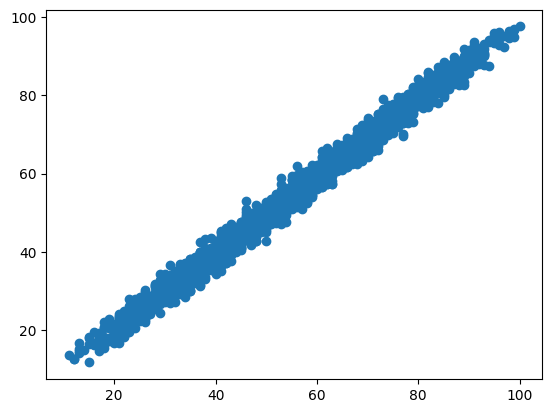

In [112]:
plt.scatter(y_test, y_pred)
plt.show()